In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_csv('dataset.csv')

In [ ]:
indices=np.random.choice(range(237),len(data)*80//100,replace=False)
indices

array([ 97, 192,   4, 230, 214, 158, 122,  73, 136,  10, 108, 193,  52,
       215, 176,  50, 113,   9,  63,  17,   5,  99,  85, 174,  39, 148,
       128,  18, 144, 236,  57, 127, 162, 152,  28,  46,  65, 125,  15,
        37,   8, 229, 147,  95,  96, 202, 199, 171,  61,  58,  60, 223,
       186, 159, 129, 210,  51, 170, 153, 112, 124,  62, 137,  32,  47,
         0, 166, 185, 189,  69, 175, 140, 213, 156, 178, 134, 105, 103,
       203, 135, 201, 212,  16, 198, 117,  30, 121,  71,  48, 196,  91,
       155, 101, 106, 114,  86,  76, 163, 150, 188, 145,  38, 133, 228,
        77,  21,  84,  72, 107, 208,  31, 233, 111,  68, 222, 172, 234,
         1, 180, 146,  82, 216,  88, 141, 102,  90,  22, 182,  56, 207,
       104,  24, 157,  74, 109,   2, 211, 139, 190,  34, 160,  42, 195,
       183, 204,  70,  11, 164,  93, 130,  19, 225, 119, 200,  12,  55,
        87, 161, 154, 177,  89,  83, 227, 181,  26, 131,   6, 209,  29,
       206,  81,  49,  66, 123,  41, 197, 232,  36, 138, 231,  4

In [ ]:
x_train=data.iloc[indices,-2]
y_train=data.iloc[indices,-1]
train=[]
for i in range(len(data)*80//100):
    if(i not in indices):
        train.append(i)
x_test=data.iloc[train,-2]
y_test=data.iloc[train,-1]

In [ ]:
#######TO NORMALIZE THE DATA SET VIA MATHEMATICAL WAY
def normalize(var):
    top=max(var)
    bot=min(var)
    slope=1/(top-bot)
    inter=1-(slope*top)
    new=var*slope+intercept
    
from sklearn.preprocessing import MinMaxScaler

In [ ]:
train_scaler=MinMaxScaler()

In [ ]:
x_train=train_scaler.fit_transform(x_train.values.reshape(-1,1))

In [ ]:
y_train=train_scaler.fit_transform(y_train.values.reshape(-1,1))

In [ ]:
test_scaler=MinMaxScaler()

In [ ]:
x_test=test_scaler.fit_transform(x_test.values.reshape(-1,1))

In [ ]:
y_test=test_scaler.fit_transform(y_test.values.reshape(-1,1))

In [ ]:
#x_train=np.array(x_train)

In [ ]:
x_train=np.concatenate((np.ones((len(x_train),1)),x_train),axis=1)
x_test=np.concatenate((np.ones((len(x_test),1)),x_test),axis=1)

In [ ]:
x_train=x_train.reshape(x_train.shape[1],x_train.shape[0])
x_test=x_test.reshape(x_test.shape[1],x_test.shape[0])

In [ ]:
x_train.shape

(2, 189)

In [ ]:
#x_train=x_train.reshape(2,int(len(x_train)/2))
#x_test=x_test.reshape(2,int(len(x_test)/2))
y_train=y_train.reshape(1,-1)

In [ ]:
slope=(y_train[0,1]-y_train[0,0])/(x_train[1,1]-x_train[1,0])
#slope=1
intercept=y_train[0,1]-x_train[1,1]*slope
#intercept=0

In [ ]:
theta=np.array([intercept,slope]).reshape(1,2)

In [ ]:
theta

array([[ 0.29031611, -0.0917867 ]])

In [ ]:
J=np.sum(np.subtract(theta.dot(x_train),y_train)**2)/2/len(x_train)
J_prev=J
alpha=0.001

In [ ]:
J

7.279497110846855

In [ ]:
while True:
    theta=np.subtract(theta,alpha*np.sum(x_train.dot(np.subtract(theta.dot(x_train),y_train).transpose()))/len(x_train))
    print(theta)
    J=np.sum(np.subtract(theta.dot(x_train),y_train)**2)/2/len(x_train)
    print(J)
    if(J>=J_prev):
        break
    J_prev=J

[[ 0.3368     -0.04530281]]
5.338042070412424
[[ 0.37384849 -0.00825432]]
4.104757275281676
[[0.4033768  0.02127398]]
3.3213286847538495
[[0.42691138 0.04480857]]
2.8236655668108854
[[0.44566886 0.06356605]]
2.5075313562967554
[[0.46061891 0.0785161 ]]
2.306711091635619
[[0.47253437 0.09043155]]
2.1791425547380086
[[0.48203119 0.09992838]]
2.098106252780846
[[0.48960034 0.10749752]]
2.0466289653979617
[[0.49563308 0.11353027]]
2.013928668712399
[[0.50044128 0.11833847]]
1.9931562182262192
[[0.5042735  0.12217069]]
1.9799607813973137
[[0.50732785 0.12522504]]
1.9715785468014742
[[0.50976222 0.12765941]]
1.966253838136598
[[0.51170246 0.12959965]]
1.9628713842048178
[[0.51324886 0.13114605]]
1.9607227230628312
[[0.51448137 0.13237856]]
1.959357813208567
[[0.51546371 0.13336089]]
1.958490771461563
[[0.51624664 0.13414383]]
1.9579399941419473
[[0.51687066 0.13476785]]
1.957590119805619
[[0.51736801 0.1352652 ]]
1.9573678665521497
[[0.51776441 0.13566159]]
1.9572266829797962
[[0.51808034 0.

In [ ]:
theta

array([[0.51932088, 0.13721806]])

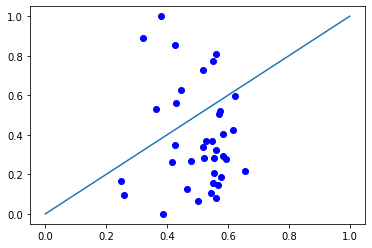

In [ ]:
plt.scatter(theta.dot(x_test).reshape(-1,1),y_test,color='b')
plt.plot([0,1],[0,1])
plt.show()